In [2]:
import numpy as np
import librosa

# Feature extraction

In [3]:
def extract_features(data, sr):
    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    
    # Chroma
    stft = np.abs(librosa.stft(data))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    
    # Mel Frequency Cepstral Coefficients
    mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0)
    
    # Stack them into one long array
    # Shape: (1 + 12 + 40) = 53 features
    result = np.hstack((zcr, chroma, mfccs))
    return result

# Preparing the data for CNN

In [4]:
import os
import glob
from pathlib import Path

emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgusted',
    '08': 'surprised'
}

def load_ravdess_data(dataset_path):
    
    data = []
    labels = []
    emotions = []
    
    # Get all wav files from actor directories
    actor_dirs = sorted(glob.glob(os.path.join(dataset_path, 'Actor_*')))
    
    for actor_dir in actor_dirs:
        wav_files = sorted(glob.glob(os.path.join(actor_dir, '*.wav')))
        
        for wav_file in wav_files:
            # Extract emotion from filename
            # Format: 03-01-05-01-01-01-01.wav where 05 is emotion
            filename = os.path.basename(wav_file).split('.')[0]
            emotion_code = filename.split('-')[2]
            emotion_label = emotion_map.get(emotion_code, 'unknown')
            
            # Load audio
            y, sr = librosa.load(wav_file)
            
            # Extract features
            features = extract_features(y, sr)
            
            data.append(features)
            emotions.append(emotion_label)
            labels.append(int(emotion_code) - 1)  # Convert to 0-indexed
    
    return np.array(data), np.array(labels), emotions

# Load the data
dataset_path = r'c:\Users\vello\OneDrive\Desktop\imp\research\SER_Project\datasets\uwrfkaggler\ravdess-emotional-speech-audio\versions\1\audio_speech_actors_01-24'
X, y, emotions = load_ravdess_data(dataset_path)

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Unique emotions: {set(emotions)}")
print(f"Emotion distribution: {np.bincount(y)}")

Data shape: (1440, 53)
Labels shape: (1440,)
Unique emotions: {'angry', 'calm', 'neutral', 'disgusted', 'happy', 'fearful', 'surprised', 'sad'}
Emotion distribution: [ 96 192 192 192 192 192 192 192]


Training set shape: (1152, 53, 1)
Test set shape: (288, 53, 1)
Number of classes: 8


c:\Users\vello\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 51, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 23, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 9, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,848 (1.60 MB)

 Trainable params: 419,848 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1216 - loss: 2.0911 - val_accuracy: 0.2078 - val_loss: 2.0453
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1618 - loss: 2.0492 - val_accuracy: 0.1732 - val_loss: 2.0195
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1965 - loss: 2.0165 - val_accuracy: 0.1732 - val_loss: 1.9776
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2237 - loss: 1.9584 - val_accuracy: 0.1732 - val_loss: 1.9730
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2410 - loss: 1.9308 - val_accuracy: 0.2381 - val_loss: 1.9203
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2486 - loss: 1.9029 - val_accuracy: 0.2251 - val_loss: 1.8815
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2899 - loss: 1.8487 - val_accuracy: 0.2511 - val_loss: 1.8458
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2910 - loss: 1.8368 - val_accuracy: 0.242

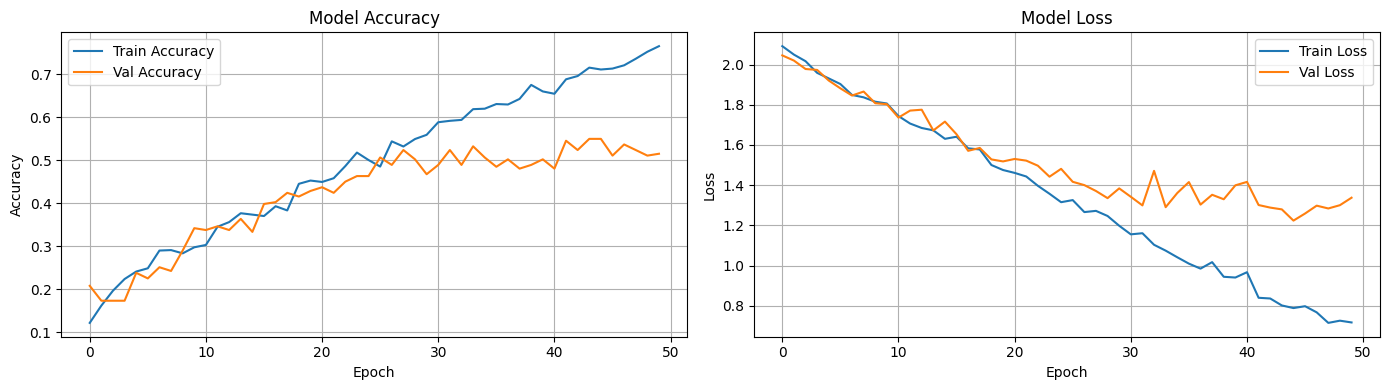

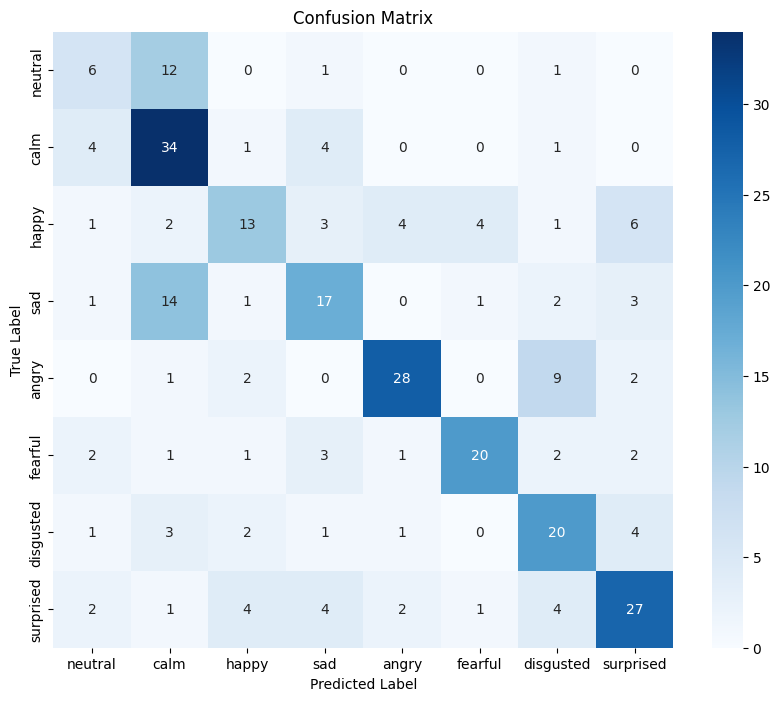

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape data for CNN (add channel dimension)
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Number of classes: {len(set(y))}")

# Build CNN model
model = keras.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),
    
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),
    
    layers.Conv1D(256, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(8, activation='softmax')  # 8 emotions
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test_scaled).argmax(axis=1)

# Classification report
print("\nClassification Report:")
emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgusted', 'surprised']
print(classification_report(y_test, y_pred, target_names=emotion_labels))

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()
ax1.grid()

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [6]:
import pickle
# SAVE
model.save('ser_model.h5')
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# LOAD (in a new notebook/script)
model = keras.models.load_model('ser_model.h5')
scaler = pickle.load(open('scaler.pkl', 'rb'))
